<a href="https://colab.research.google.com/github/vantoanvo/TinyML/blob/main/create_sine_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.4441 - mae: 0.5621 - val_loss: 0.3947 - val_mae: 0.5443
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3575 - mae: 0.5191 - val_loss: 0.3523 - val_mae: 0.5111
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3197 - mae: 0.4908 - val_loss: 0.3154 - val_mae: 0.4822
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2873 - mae: 0.4658 - val_loss: 0.2842 - val_mae: 0.4570
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2601 - mae: 0.4454 - val_loss: 0.2586 - val_mae: 0.4375
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2381 - mae: 0.4282 - val_loss: 0.2382 - val_mae: 0.4214
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2207 - mae: 0.4138 - val_loss: 0.2225 - val_mae: 0.4091
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2075 - mae: 0.4024 - val_loss: 0.2107 - val_mae: 0.3989
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

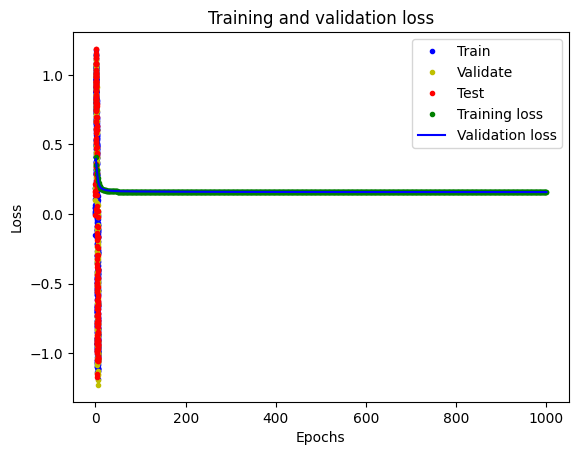

In [34]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

#Create sample size
SAMPLES = 1000
#Set seed value to keep the same random number everytime
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED) #if only set np.random.seed(SEED), the results might be different for model training tf

#generate uniformed set of random numbers in the range from 0 to 2n,
#which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

#shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

#Calculate the corresponding sine values
y_values = np.sin(x_values)

#add some random noise to each y value, use y_values.shape to make sure the new data is the same shape as y_values
y_values += 0.1 * np.random.randn(*y_values.shape)

#split the data: 20% for validation, 20% for testing, 60% for training
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

#use np.split to chop date into three parts
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT]) #from 0 to TRAIN_SPLIT, from TRAIN_SPLIT to TEST_SPLIT
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

#plot the data in each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")

#build a regression model
model_1 = tf.keras.Sequential()

#first layer takes a scalar input and feeds it through 16 "neurons"
#neurons decide whether to activate based on the 'relu' activation function
#1 means the input is a single value
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

#final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

#compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#print the model's architecture
model_1.summary()

#train the data
history_1 = model_1.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=1000, batch_size=16)

#Graph
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

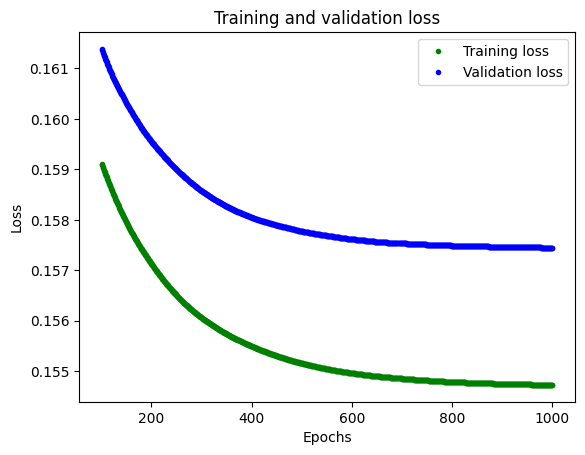

In [35]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

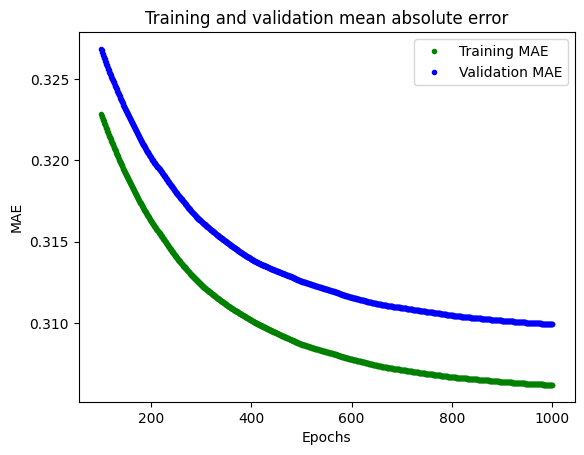

In [36]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae'] #measuring the amount of error in the prediction
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


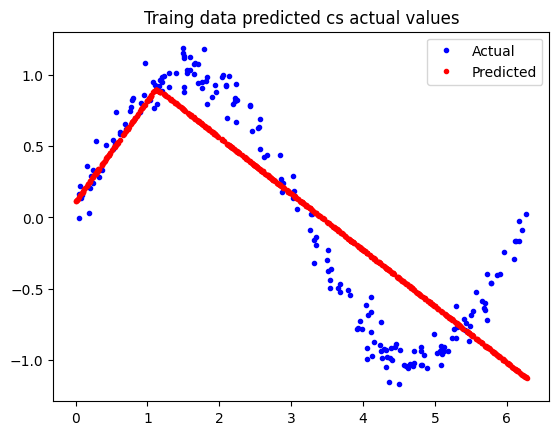

In [37]:
predictions = model_1.predict(x_train)

#plot the predictions along with the test data
plt.clf()
plt.title('Traing data predicted cs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [38]:
model_2 = tf.keras.Sequential()
#first layer
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
#second layer
model_2.add(layers.Dense(16, activation='relu'))
#final layer
model_2.add(layers.Dense(1))
#compile the model
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

#print the model's architecture
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history_2 = model_2.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=600, batch_size=16)
#

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2199 - mae: 0.9295 - val_loss: 0.7423 - val_mae: 0.7760
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6234 - mae: 0.7124 - val_loss: 0.5325 - val_mae: 0.6509
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4918 - mae: 0.6269 - val_loss: 0.5166 - val_mae: 0.6375
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4632 - mae: 0.6055 - val_loss: 0.4607 - val_mae: 0.5957
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4213 - mae: 0.5736 - val_loss: 0.4274 - val_mae: 0.5684
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3905 - mae: 0.5485 - val_loss: 0.3926 - val_mae: 0.5396
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3581 - mae: 0.5212 - val_loss: 0.3578 - val_mae: 0.5106
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3254 - mae: 0.4934 - val_loss: 0.3220 - val_mae: 0.4808
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.29

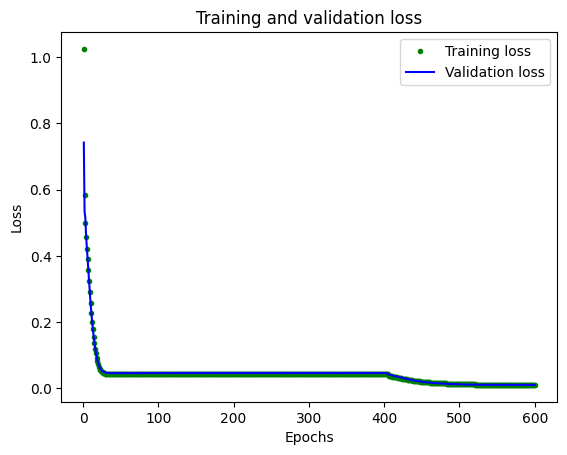

In [40]:
#draw a graph of the loss, which is distance between the predicted and actual values
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

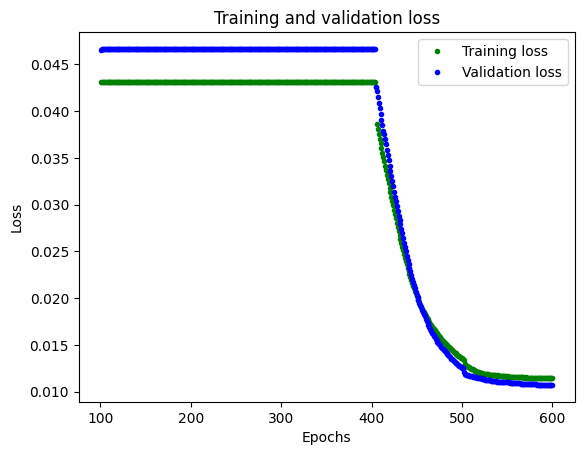

In [43]:
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0, 0.5, 'MAE')

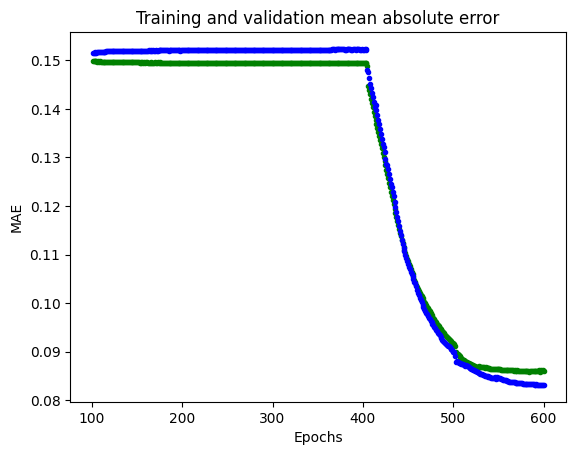

In [46]:
#plot the mean absolute error
plt.clf() #clear windows

#plot the graph
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mae: 0.0726 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


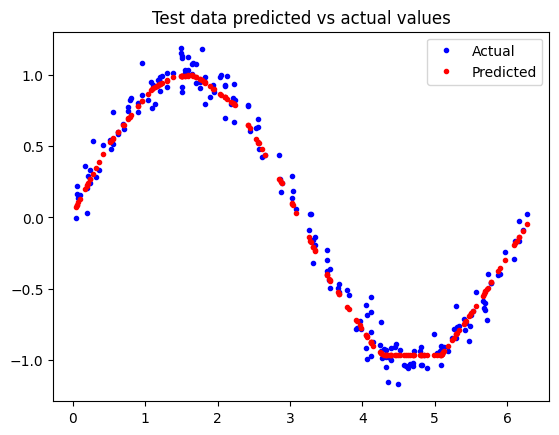

In [47]:
#calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
#make prediction based on the test data
predictions = model_2.predict(x_test)

#Graph the prediction against actual data
plt.clf()
plt.title('Test data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [48]:
#convert the model to the Tensorflow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

#save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpz774p0jw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_26')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133674354910096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354904336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354912400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354901456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133676859019664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354915472: TensorSpec(shape=(), dtype=tf.resource, name=None)


3180

In [49]:
#convert the model to the Tensorflow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
#indicate that we want to perform the default optimizations, which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

#define a generator function that provides our test data's x values as a representative dataset, and tell the converter to use it

def representative_dataset_generator():
  for value in x_test:
    #Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]

#set the representative dataset
converter.representative_dataset = representative_dataset_generator

#convert the model
tflite_model = converter.convert()

#save the model
open("sine_model_quantized.tflite", "wb").write(tflite_model)

Saved artifact at '/tmp/tmpm_jpcsca'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_26')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133674354910096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354904336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354912400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354901456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133676859019664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133674354915472: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3792